In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [76]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [77]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257125 entries, 0 to 1257124
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1257125 non-null  int64  
 1   kWh       1257125 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 19.2 MB


In [78]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1257120    0.13
1257121    0.13
1257122    0.13
1257123    0.13
1257124    0.13
Name: kWh, Length: 1257125, dtype: float64

In [79]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1257120    0.13
1257121    0.13
1257122    0.13
1257123    0.13
1257124    0.13
Name: kWh, Length: 1257125, dtype: float64

In [80]:
l=len(conso_data)-1
l

1257124

In [81]:
conso_data['sec']=conso_data['Interval']/1000


In [82]:
conso_data['Wh']=3600000/conso_data['Interval']


In [83]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [84]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257125 entries, 0 to 1257124
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1257125 non-null  int64  
 1   kWh        1257125 non-null  float64
 2   sec        1257125 non-null  float64
 3   Wh         1257125 non-null  float64
 4   cumul(ms)  1257125 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 48.0 MB


In [85]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1257120,26740,0.13,26.740,134.629768,29650963345
1257121,26669,0.13,26.669,134.988189,29650990014
1257122,26725,0.13,26.725,134.705332,29651016739
1257123,26781,0.13,26.781,134.423659,29651043520
1257124,27073,0.13,27.073,132.973812,29651070593


In [86]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

29651070593000

In [87]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 8, 0, 696232)

In [88]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [89]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [90]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [91]:
conso_data['dates']

0         2023-08-21 19:08:22.630232
1         2023-08-21 19:08:44.488232
2         2023-08-21 19:09:06.489232
3         2023-08-21 19:09:28.417232
4         2023-08-21 19:09:50.308232
                     ...            
1257120   2024-07-29 23:30:44.041232
1257121   2024-07-29 23:31:10.710232
1257122   2024-07-29 23:31:37.435232
1257123   2024-07-29 23:32:04.216232
1257124   2024-07-29 23:32:31.289232
Name: dates, Length: 1257125, dtype: datetime64[ns]

In [92]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:08:22.630232,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:08:44.488232,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:09:06.489232,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:09:28.417232,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:09:50.308232,21/08/23
...,...,...,...,...,...,...,...
1257120,26740,0.13,26.740,134.629768,29650963345,2024-07-29 23:30:44.041232,29/07/24
1257121,26669,0.13,26.669,134.988189,29650990014,2024-07-29 23:31:10.710232,29/07/24
1257122,26725,0.13,26.725,134.705332,29651016739,2024-07-29 23:31:37.435232,29/07/24
1257123,26781,0.13,26.781,134.423659,29651043520,2024-07-29 23:32:04.216232,29/07/24


In [93]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('29/07/24', 29, 7, 2024)

In [94]:
here = now.strftime('%H:%M:%S')
here

'23:32:53'

In [95]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [96]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3014 entries, 1254111 to 1257124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3014 non-null   int64         
 1   kWh        3014 non-null   float64       
 2   sec        3014 non-null   float64       
 3   Wh         3014 non-null   float64       
 4   cumul(ms)  3014 non-null   int64         
 5   dates      3014 non-null   datetime64[ns]
 6   days       3014 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 188.4+ KB


In [97]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [98]:
data = list(df_grp['kWh'])
print(data)


[0.83, 3.7, 4.231, 3.679, 4.189, 4.607, 3.526, 3.409, 3.514, 3.694, 3.765, 3.798, 4.254, 3.805, 3.467, 3.64, 3.322, 3.376, 4.286, 4.007, 4.044, 3.926, 3.444, 4.453, 3.747, 3.76, 4.362, 4.685, 3.805, 3.224, 3.179, 3.998, 3.674, 3.163, 3.798, 4.144, 3.756, 3.573, 4.78, 4.189, 4.543, 3.773, 3.409, 4.303, 3.878, 3.863, 3.437, 4.081, 3.655, 3.399, 4.134, 3.384, 3.887, 3.835, 3.642, 3.753, 4.244, 3.302, 3.871, 2.981, 2.055, 2.041, 2.454, 4.088, 3.723, 4.33, 3.614, 3.922, 3.743, 3.917, 3.991, 4.109, 3.649, 3.157, 3.804, 3.511, 3.624, 3.709, 3.685, 3.239, 3.905, 3.214, 3.791, 3.608, 4.082, 3.564, 3.389, 3.815, 4.064, 4.333, 4.132, 3.998, 4.231, 3.747, 3.925, 3.863, 3.914, 3.741, 4.046, 4.346, 3.885, 3.505, 3.682, 3.672, 3.347, 3.846, 3.995, 4.103, 3.474, 4.175, 3.606, 4.075, 4.534, 3.682, 3.43, 3.58, 4.163, 3.696, 4.083, 3.981, 3.745, 3.592, 5.127, 3.7, 3.765, 4.292, 4.103, 4.713, 4.402, 3.984, 3.777, 4.361, 4.682, 4.198, 4.789, 4.318, 3.723, 4.179, 3.705, 3.638, 3.531, 3.944, 3.675, 3.786, 3.

In [99]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [100]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [101]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [102]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.304696
dtype: float64

In [103]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.654433
dtype: float64

In [104]:
last=df_grp.iloc[-1]['kWh']
last

3.014

In [105]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3014 entries, 1254111 to 1257124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3014 non-null   int64         
 1   kWh        3014 non-null   float64       
 2   sec        3014 non-null   float64       
 3   Wh         3014 non-null   float64       
 4   cumul(ms)  3014 non-null   int64         
 5   dates      3014 non-null   datetime64[ns]
 6   days       3014 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 188.4+ KB


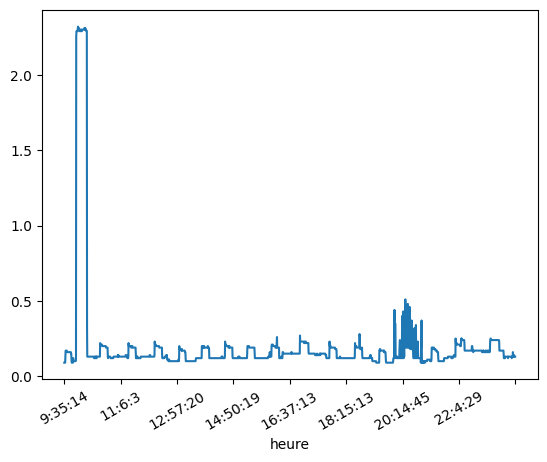

In [106]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [107]:
conso_day['heure']


1254111       0:0:3
1254112      0:0:33
1254113       0:1:1
1254114      0:1:28
1254115      0:1:56
             ...   
1257120    23:30:44
1257121    23:31:10
1257122    23:31:37
1257123     23:32:4
1257124    23:32:31
Name: heure, Length: 3014, dtype: object

In [108]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:3',
             days   kWh
  heure                
  0:0:3  29/07/24  0.12),
 ('0:0:33',
              days   kWh
  heure                 
  0:0:33  29/07/24  0.12),
 ('0:1:1',
             days   kWh
  heure                
  0:1:1  29/07/24  0.12),
 ('0:1:28',
              days   kWh
  heure                 
  0:1:28  29/07/24  0.13),
 ('0:1:56',
              days   kWh
  heure                 
  0:1:56  29/07/24  0.13),
 ('0:2:24',
              days   kWh
  heure                 
  0:2:24  29/07/24  0.13),
 ('0:2:53',
              days   kWh
  heure                 
  0:2:53  29/07/24  0.13),
 ('0:3:21',
              days   kWh
  heure                 
  0:3:21  29/07/24  0.13),
 ('0:3:50',
              days   kWh
  heure                 
  0:3:50  29/07/24  0.13),
 ('0:4:18',
              days   kWh
  heure                 
  0:4:18  29/07/24  0.13),
 ('0:4:46',
              days   kWh
  heure                 
  0:4:46  29/07/24  0.13),
 ('0:5:15',
              day

In [109]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:3',
  heure
  0:0:3    0.12
  Name: kWh, dtype: float64),
 ('0:0:33',
  heure
  0:0:33    0.12
  Name: kWh, dtype: float64),
 ('0:1:1',
  heure
  0:1:1    0.12
  Name: kWh, dtype: float64),
 ('0:1:28',
  heure
  0:1:28    0.13
  Name: kWh, dtype: float64),
 ('0:1:56',
  heure
  0:1:56    0.13
  Name: kWh, dtype: float64),
 ('0:2:24',
  heure
  0:2:24    0.13
  Name: kWh, dtype: float64),
 ('0:2:53',
  heure
  0:2:53    0.13
  Name: kWh, dtype: float64),
 ('0:3:21',
  heure
  0:3:21    0.13
  Name: kWh, dtype: float64),
 ('0:3:50',
  heure
  0:3:50    0.13
  Name: kWh, dtype: float64),
 ('0:4:18',
  heure
  0:4:18    0.13
  Name: kWh, dtype: float64),
 ('0:4:46',
  heure
  0:4:46    0.13
  Name: kWh, dtype: float64),
 ('0:5:15',
  heure
  0:5:15    0.13
  Name: kWh, dtype: float64),
 ('0:5:43',
  heure
  0:5:43    0.13
  Name: kWh, dtype: float64),
 ('0:6:12',
  heure
  0:6:12    0.13
  Name: kWh, dtype: float64),
 ('0:6:40',
  heure
  0:6:40    0.13
  Name: kWh, dtype: float64),

In [110]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:3,29643,0.12,29.643,121.445198,29566322953,2024-07-29 00:00:03.649232,29/07/24
0:0:33,29543,0.12,29.543,121.856277,29566352496,2024-07-29 00:00:33.192232,29/07/24
0:1:1,28715,0.12,28.715,125.370016,29566381211,2024-07-29 00:01:01.907232,29/07/24
0:1:28,27043,0.13,27.043,133.121325,29566408254,2024-07-29 00:01:28.950232,29/07/24
0:1:56,27336,0.13,27.336,131.694469,29566435590,2024-07-29 00:01:56.286232,29/07/24
...,...,...,...,...,...,...,...
23:30:44,26740,0.13,26.740,134.629768,29650963345,2024-07-29 23:30:44.041232,29/07/24
23:31:10,26669,0.13,26.669,134.988189,29650990014,2024-07-29 23:31:10.710232,29/07/24
23:31:37,26725,0.13,26.725,134.705332,29651016739,2024-07-29 23:31:37.435232,29/07/24


In [111]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [112]:
df.iloc[0].dates

Timestamp('2024-07-29 00:00:03.649232')

In [113]:
df.dates.dt.time

heure
0:0:3       00:00:03.649232
0:0:33      00:00:33.192232
0:1:1       00:01:01.907232
0:1:28      00:01:28.950232
0:1:56      00:01:56.286232
                 ...       
23:30:44    23:30:44.041232
23:31:10    23:31:10.710232
23:31:37    23:31:37.435232
23:32:4     23:32:04.216232
23:32:31    23:32:31.289232
Name: dates, Length: 3014, dtype: object

In [114]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [115]:
tranches = len(df)//1000
tranches+1

4

In [116]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-07-29 00:00:03.649232	2024-07-29 09:25:26.753232	9h 25m 23s 	1000
2024-07-29 09:25:26.753232	2024-07-29 16:31:19.884232	7h 5m 53s 	2000
2024-07-29 16:31:19.884232	2024-07-29 23:26:18.689232	6h 54m 58s 	3000
2024-07-29 23:26:18.689232	2024-07-29 23:32:31.289232	0h 6m 12s 	14


In [117]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('23:32:53', 3.014, 3014)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3014 entries, 0:0:3 to 23:32:31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3014 non-null   int64         
 1   kWh        3014 non-null   float64       
 2   sec        3014 non-null   float64       
 3   Wh         3014 non-null   float64       
 4   cumul(ms)  3014 non-null   int64         
 5   dates      3014 non-null   datetime64[ns]
 6   days       3014 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 252.9+ KB


In [119]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [120]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 21/08/23 to 29/07/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     344 non-null    float64
dtypes: float64(1)
memory usage: 5.4+ KB


In [121]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [122]:
df_grp.tail(7)

,kWh
days,
23/07/24,3.565
24/07/24,3.599
25/07/24,3.449
26/07/24,3.211
27/07/24,3.158
28/07/24,2.880
29/07/24,3.014


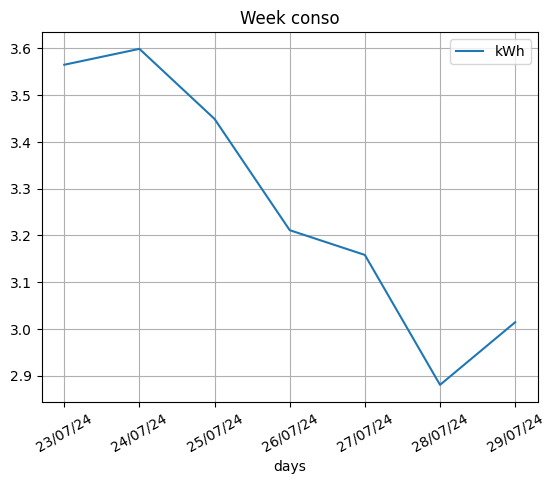

In [123]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [124]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [125]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


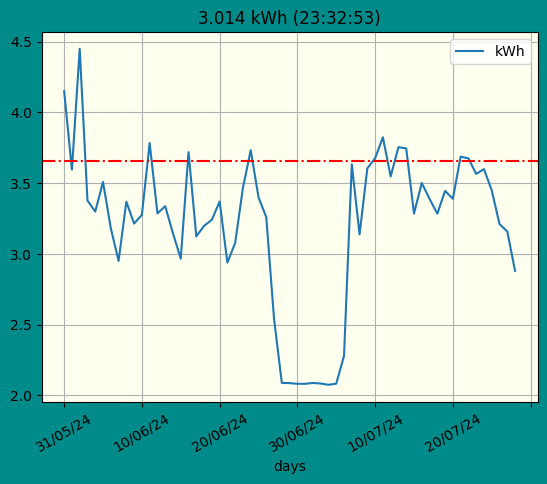

In [126]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [127]:
df_grp.mean()

kWh    3.654433
dtype: float64

In [128]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
16/07/24,3.501
17/07/24,3.389
18/07/24,3.284
19/07/24,3.445
20/07/24,3.389
21/07/24,3.687
22/07/24,3.675
23/07/24,3.565
24/07/24,3.599


In [129]:
df_grp

,kWh
days,
21/08/23,0.830
22/08/23,3.700
23/08/23,4.231
24/08/23,3.679
25/08/23,4.189
...,...
25/07/24,3.449
26/07/24,3.211
27/07/24,3.158


In [130]:
df_grp.tail(100).mean()

kWh    3.35569
dtype: float64

<Axes: xlabel='days'>

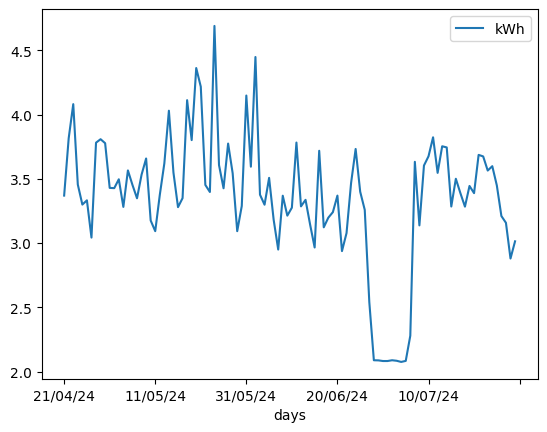

In [131]:
df_grp.tail(100).plot()

In [132]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.109933
std,0.648380
min,2.075000
25%,2.429250
50%,3.389000
75%,3.602750
max,3.824000


In [133]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

11/07/24 3.824
04/07/24 2.075


In [134]:
day

'29/07/24'

In [135]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1254111,29643,0.12,29.643,121.445198,29566322953,2024-07-29 00:00:03.649232,29/07/24,0:0:3
1254112,29543,0.12,29.543,121.856277,29566352496,2024-07-29 00:00:33.192232,29/07/24,0:0:33
1254113,28715,0.12,28.715,125.370016,29566381211,2024-07-29 00:01:01.907232,29/07/24,0:1:1
1254114,27043,0.13,27.043,133.121325,29566408254,2024-07-29 00:01:28.950232,29/07/24,0:1:28
1254115,27336,0.13,27.336,131.694469,29566435590,2024-07-29 00:01:56.286232,29/07/24,0:1:56
...,...,...,...,...,...,...,...,...
1257120,26740,0.13,26.740,134.629768,29650963345,2024-07-29 23:30:44.041232,29/07/24,23:30:44
1257121,26669,0.13,26.669,134.988189,29650990014,2024-07-29 23:31:10.710232,29/07/24,23:31:10
1257122,26725,0.13,26.725,134.705332,29651016739,2024-07-29 23:31:37.435232,29/07/24,23:31:37
1257123,26781,0.13,26.781,134.423659,29651043520,2024-07-29 23:32:04.216232,29/07/24,23:32:4


In [136]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3014 entries, 1254111 to 1257124
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3014 non-null   int64         
 1   kWh        3014 non-null   float64       
 2   sec        3014 non-null   float64       
 3   Wh         3014 non-null   float64       
 4   cumul(ms)  3014 non-null   int64         
 5   dates      3014 non-null   datetime64[ns]
 6   days       3014 non-null   object        
 7   heure      3014 non-null   object        
 8   hours      3014 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 235.5+ KB


In [137]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1254111    00  0.12
  1254112    00  0.12
  1254113    00  0.12
  1254114    00  0.13
  1254115    00  0.13
  ...       ...   ...
  1254220    00  0.10
  1254221    00  0.09
  1254222    00  0.09
  1254223    00  0.09
  1254224    00  0.09
  
  [114 rows x 2 columns]),
 ('01',
          hours   kWh
  1254225    01  0.09
  1254226    01  0.09
  1254227    01  0.10
  1254228    01  0.10
  1254229    01  0.10
  ...       ...   ...
  1254326    01  0.09
  1254327    01  0.09
  1254328    01  0.09
  1254329    01  0.09
  1254330    01  0.09
  
  [106 rows x 2 columns]),
 ('02',
          hours   kWh
  1254331    02  0.09
  1254332    02  0.12
  1254333    02  0.18
  1254334    02  0.18
  1254335    02  0.18
  ...       ...   ...
  1254433    02  0.14
  1254434    02  0.18
  1254435    02  0.18
  1254436    02  0.17
  1254437    02  0.17
  
  [107 rows x 2 columns]),
 ('03',
          hours   kWh
  1254438    03  0.17
  1254439    03  0.17
  1254440    03  0.1

In [138]:
groupedbyhour.count()

,kWh
hours,
00,114
01,106
02,107
03,111
04,109
05,106
06,104
07,102
08,102


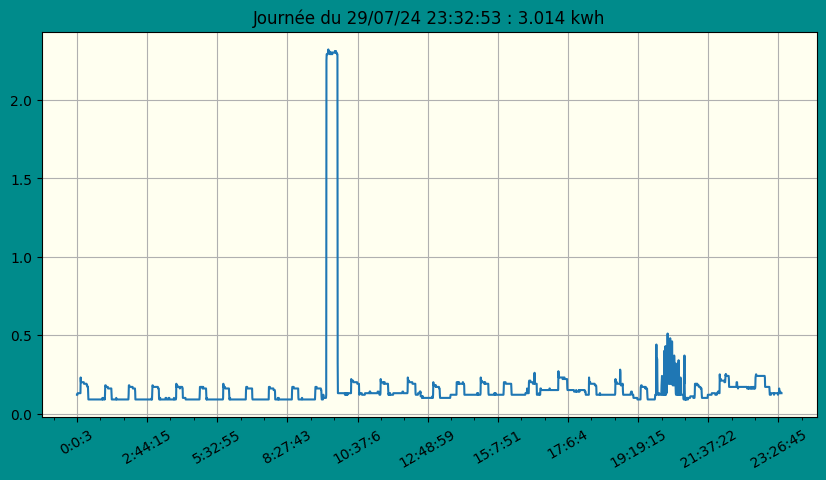

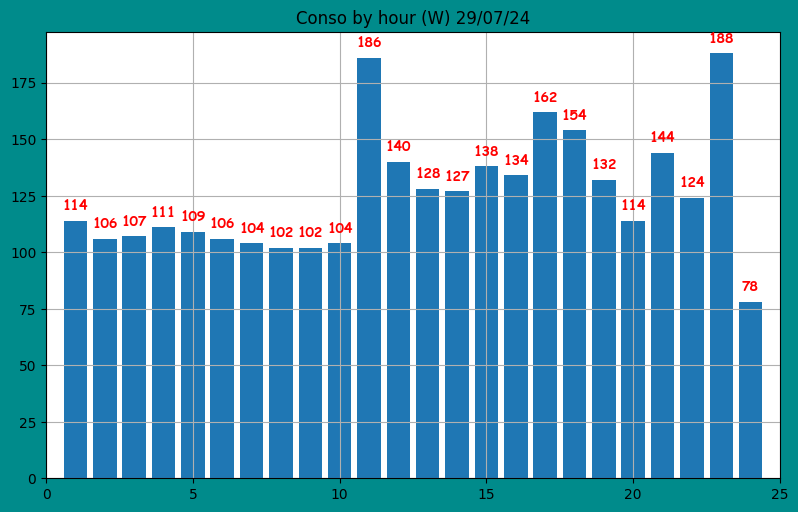

In [139]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [140]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [141]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [142]:
#conso_byhour(day)

In [143]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

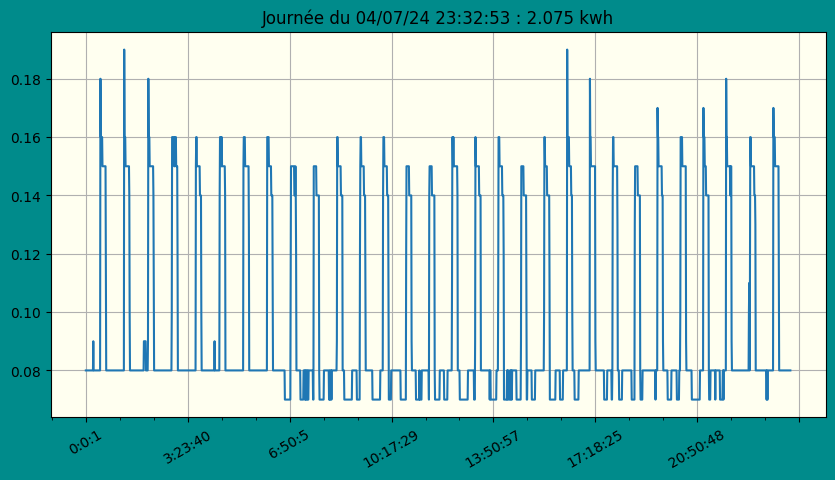

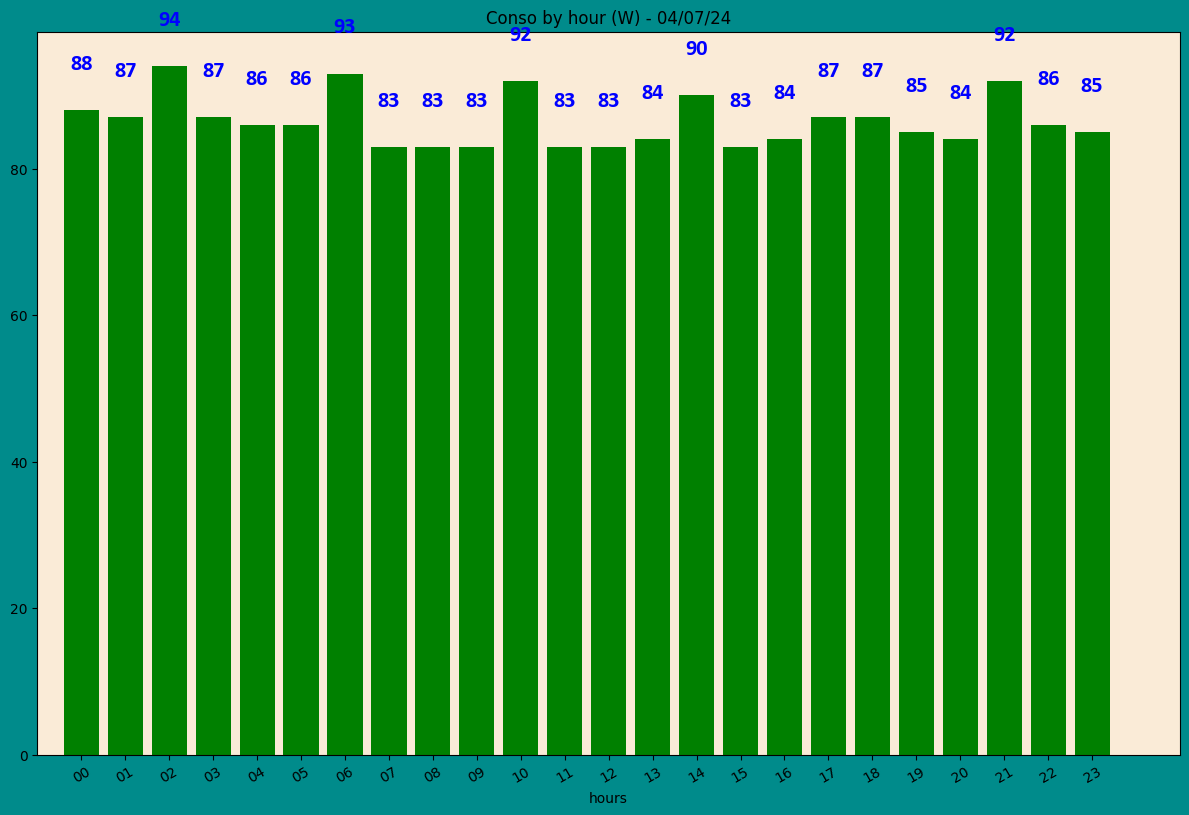

In [144]:
# plot any day
day = '04/07/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [145]:
month

days
29/06/24    2.087
30/06/24    2.082
01/07/24    2.082
02/07/24    2.088
03/07/24    2.084
04/07/24    2.075
05/07/24    2.083
06/07/24    2.279
07/07/24    3.633
08/07/24    3.138
09/07/24    3.604
10/07/24    3.676
11/07/24    3.824
12/07/24    3.547
13/07/24    3.754
14/07/24    3.745
15/07/24    3.285
16/07/24    3.501
17/07/24    3.389
18/07/24    3.284
19/07/24    3.445
20/07/24    3.389
21/07/24    3.687
22/07/24    3.675
23/07/24    3.565
24/07/24    3.599
25/07/24    3.449
26/07/24    3.211
27/07/24    3.158
28/07/24    2.880
Name: kWh, dtype: float64

In [146]:
month.idxmax()

'11/07/24'

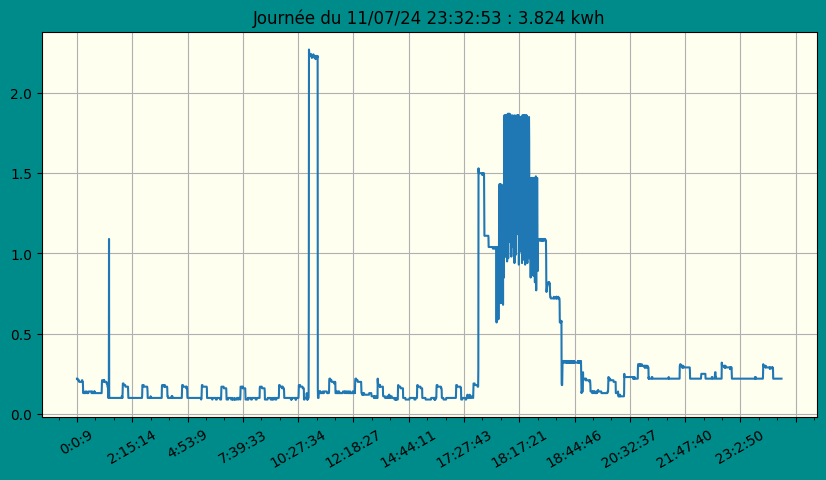

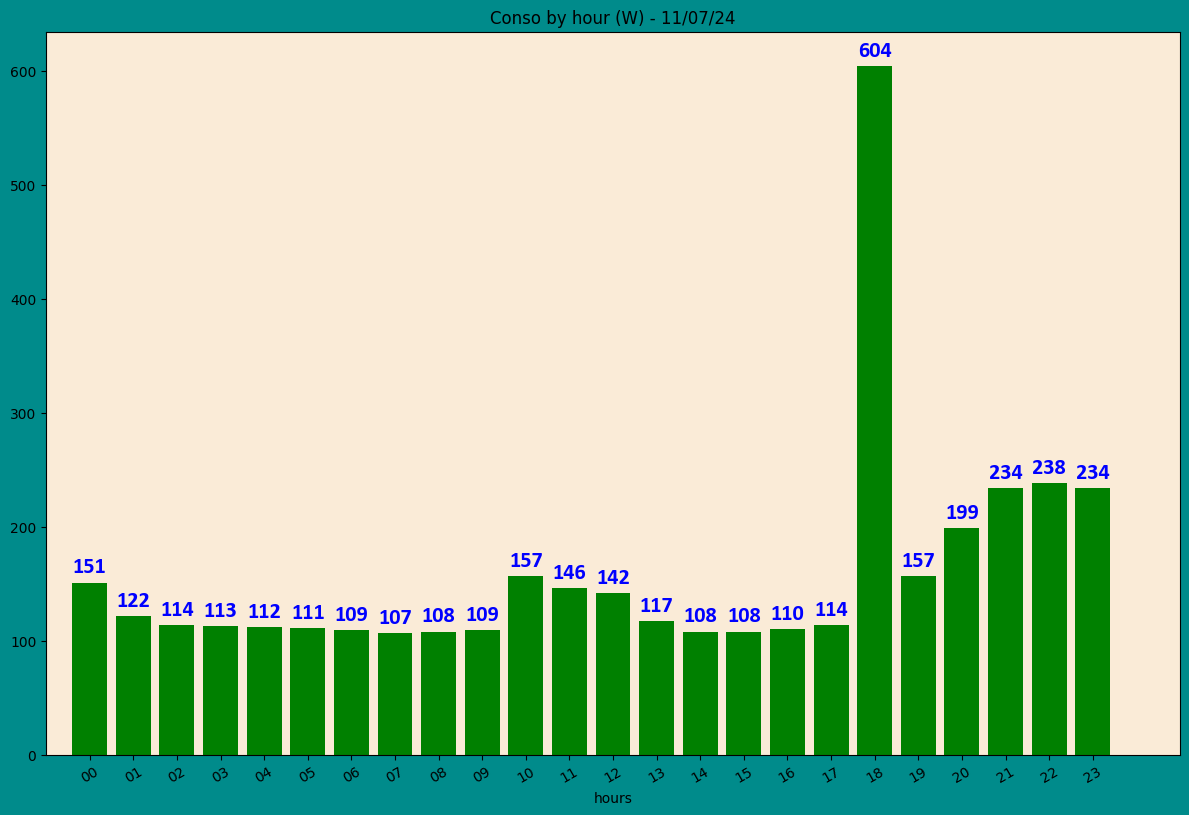

In [147]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [148]:
filename='conso_data.csv'
#conso_data.to_csv(filename)